In [7]:
import re

import pandas as pd
import stopwords
from IPython.display import clear_output
from gensim import corpora, models
from gensim.models import Phrases, LdaModel
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

df = pd.read_csv("../out/extended_full_cleaned_paper.csv") # import dataset from csv-file
df = df.drop(['specified_class','ccs','year','authors','doi'], axis=1) #drop not needed columns
# print some information about dataset to verify
print(df.head(), df.shape)

              filename                                              title  \
0  plain_text__3300231           A Translational Science Model for HCI      
1  plain_text__3300232   “They Don't Leave Us Alone Anywhere We Go”: G...   
2  plain_text__3300233             Guidelines for Human-AI Interaction      
3  plain_text__3300234   Refinement Tools for Coping with Imperfect Al...   
4  plain_text__3300235   Modeling Fully and Partially Constrained Lass...   

                                            keywords  \
0  ['  Translational Science', 'Translational Res...   
1  ['  Online abuse', 'Privacy', 'Stalking', 'Imp...   
2  ['  Human-AI interaction', 'AI-infused systems...   
3  ['  Human-AI interaction', 'machine learning',...   
4  ['  Graphical User Interfaces', 'Human Motor P...   

                                            abstract  \
0  Using scientific discoveries to inform design ...   
1  South Asia faces one of the largest gender gap...   
2  Advances in artificial intell

In [8]:
extended_stopwords = ['users', 'user', 'participants', 'study', 'research', 'data', 'figure', 'design', 'work', 'survey'] #assign individual stopwords


def preprocess(doc):
    doc = simple_preprocess(doc)
    cleaned_doc = list()
    for word in doc: #go trough any doc
        if word not in stopwords.words( #select every word, not found in stopwords.words
                'english') and word not in extended_stopwords:
            word = re.sub(r'[^A-Za-z +]', '', word) #remove all special characters from word
            word.strip().lower() # strip not needed whitespaces from word
            cleaned_doc.append(word) #append cleaned word into new text without stopwords
    doc = cleaned_doc
    return doc

from textblob import TextBlob
def preprocess_v2(doc):
    blob = TextBlob(doc) # process doc with nlp to extract only noun_phrases
    return blob.noun_phrases

In [11]:
texts = list()
#process any paper found in csv-file with the above described processing
for index, doc in df.iterrows():
    clear_output(wait=False)
    print("processing paper no: ", index + 1, " of ", len(df))
    if type(doc.fulltext) == str:
        texts.append(preprocess_v2(doc.fulltext))
        # texts.append(doc.cleaned_fulltext)
print("successfully processed data of", len(texts), "documents!")



processing paper no:  3581  of  3581
successfully processed data of 3557 documents!


TypeError: Can only merge Series or DataFrame objects, a <class 'list'> was passed

In [27]:
#write all cleaned texts into one big file
with open("texts.txt", "w") as text_file:
    for items in texts:
        text_file.write('%s\n' %items)
print("successfully saved data of", len(texts), "documents into texts.txt!")

successfully saved data of 3557 documents into texts.txt!


In [6]:
# let lda extract 150 topics from given papers texts

dictionary = corpora.Dictionary(texts) # create dictionary

corpus = [dictionary.doc2bow(doc) for doc in texts] #create bow of all docs

# build lda-model
lda_model_150 = models.LdaModel(corpus=corpus, num_topics=150, id2word=dictionary, passes=10) #train lda with 150 topics on given dictionary and corpus
lda_model_150.save("lda_model_150") # save model for later use
            
for i, topic in lda_model_150.show_topics(num_topics=-1, formatted=False):
    print('Topic {}: {}'.format(i, ', '.join([word[0] for word in topic])))

Topic 0: figure, experiment, fitts, esm, mt, error rate, dr, id, p .., cps
Topic 1: idd, cap, online meetings, ends, in-game decisions, pie charts, puffpacket, hep, focus group participants, code sheet
Topic 2: ots, mcp, at, ot, diy at, social perceptions, cad, trustworthy, capacitive image, occupational therapists
Topic 3: shci, literature reviews, hci, waste management, muslim, sdg, np, personas, sexual health, literature review
Topic 4: tanya, two-factor authentication, causal reasoning, d-auth, fabrication activities, causal diagram, causal diagrams, causal relationships, statistical features, camera shot
Topic 5: mental health, mental illness, negative emotions, physical activity, tbi, mental, social media, instagram, sns, cbt
Topic 6: asr, crowd work, recall, wer, its, p t, shra, adio, t. p, respeak
Topic 7: army, bts, armys, magic, matchamillion, btss, weverse, korean, team efficacy, blm
Topic 8: deepfakes, chws, pvi, stm, deepfake, code generator, igscript, rois, lisa, gans
Top

In [7]:
#same process as previous cell


#300 topics
dictionary = corpora.Dictionary(texts)

corpus = [dictionary.doc2bow(doc) for doc in texts]

# build lda-model
lda_model_300 = models.LdaModel(corpus=corpus, num_topics=300, id2word=dictionary, passes=10)
lda_model_300.save("lda_model_300")
            
for i, topic in lda_model_300.show_topics(num_topics=-1, formatted=False):
    print('Topic {}: {}'.format(i, ', '.join([word[0] for word in topic])))

Topic 0: mturk, hits, hit, turkers, amazon mechanical turk, vipo, mechanical turk, personal information, auto, amazon mechanical turk mturk
Topic 1: co, emg, type, dst, stress levels, stress level, social acceptability, i-, clinical practice, clinicians
Topic 2: movement variability, gmm, behavioral cues, mv, task axis, sigma, target selection tasks, drawing tablet, path metrics, rescue
Topic 3: pvi, tcs, draco, physical forms, consent decision, implicit cues, visual impairments, dziban, voyager, graphscape
Topic 4: dr, board games, visual impairment, board game, owners, challenge, metaprobes, mouill, concert hall, audio recordings
Topic 5: rnn, design elements, vinci, dom, cast, pyrus, sws, css, spacewalker, sondam
Topic 6: job seekers, lda, visual artists, topic, tg, ground truth, job search, social support, massive, linkedin
Topic 7: hg, safety drivers, bpm, rft, pmt, gaze aversion, prevention focus, signed, promotion focus, safety driver
Topic 8: rob, audio production, financial bu

In [8]:
#same process as previous cess
#1000 topics
dictionary = corpora.Dictionary(texts)

corpus = [dictionary.doc2bow(doc) for doc in texts]

# build lda-model
lda_model_1000 = models.LdaModel(corpus=corpus, num_topics=1000, id2word=dictionary, passes=10)
lda_model_1000.save("lda_model_1000")
            
for i, topic in lda_model_1000.show_topics(num_topics=-1, formatted=False):
    print('Topic {}: {}'.format(i, ', '.join([word[0] for word in topic])))

Topic 0: china, ats, at, live streams, p., picture shows, food delivery, streamers, viewers, snapstream
Topic 1: youtube, youtubes, tanya, mobile app, videos, rq, watch, causal diagram, music videos, users sense
Topic 2: diffusion, gc, phone use, esms, causal effect, certain emotions, risk communication, causal relationship, ccm, quality images
Topic 3: figure, sd, white text, cast, acm, voicecuts, ar, al, experiment, itss
Topic 4: figure, peripheral awareness, vr, proceedings, hci, conotate, query suggestions, ar, ashas, halolight
Topic 5: in, pants, high water, sea level rise, seattle, everyday cyclists, material speculations, material speculation, cyclists, rtd
Topic 6: csa, csas, euro, c., hirsch, referring, character, agricultural production, thats, food systems
Topic 7: source, search terms, p -value, gini, google, news sources, turn, fox, search term, top stories
Topic 8: simpoint, physical circuit, simpoints, specification language, spice, parameter-response analyses, parameter

In [32]:
from gensim.test.utils import datapath

#test lda_model to check wether topics are related for human-reader

i=0
f = open("texts.txt", "r")
texts_act = f.readlines()
dictionary = corpora.Dictionary(texts)
stats_topic_to_paper = pd.DataFrame(columns=['file', 'topic', "security"])
number_of_paper_per_topic = pd.DataFrame(columns=['topic','number_of_paper'])
ldamodel = LdaModel.load('lda_model_150')
for index, row in df.iterrows():
    if type(row.fulltext) == str:
        topics = ldamodel.get_document_topics(dictionary.doc2bow(preprocess_v2(row.fulltext)))
        top_topic = max(topics, key=lambda x: x[1])
        stats_topic_to_paper.loc[len(stats_topic_to_paper.index)] = [row.filename, top_topic[0], top_topic[1]]
        i=i+1
        print(i," of ",len(df.index),row.filename, top_topic, ldamodel.id2word[top_topic[0]], row.title.strip())
    
stats_topic_to_paper

1  of  3581 plain_text__3300231 (55, 0.4956135) basic sciences A Translational Science Model for HCI
2  of  3581 plain_text__3300232 (122, 0.53887606) continual improvement “They Don't Leave Us Alone Anywhere We Go”: Gender and Digital Abuse in South Asia
3  of  3581 plain_text__3300233 (148, 0.9290484) design field Guidelines for Human-AI Interaction
4  of  3581 plain_text__3300234 (38, 0.34824687) applicability barrier Refinement Tools for Coping with Imperfect Algorithms During Medical Decision-Making
5  of  3581 plain_text__3300235 (0, 0.48104385) academia Modeling Fully and Partially Constrained Lasso Movements in a Grid of Icons
6  of  3581 plain_text__3300236 (27, 0.2875537) additional insights Design and Plural Heritages     Composing Critical Futures
7  of  3581 plain_text__3300237 (38, 0.8999695) applicability barrier Connect-to-Connected Worlds     Piloting a Mobile, Data-Driven Reflection Tool for an Open-Ended Exhibit
8  of  3581 plain_text__3300238 (129, 0.47713652) count

,file,topic,security
0,plain_text__3300231,55,0.495613
1,plain_text__3300232,122,0.538876
2,plain_text__3300233,148,0.929048
3,plain_text__3300234,38,0.348247
4,plain_text__3300235,0,0.481044
...,...,...,...
3552,plain_text__3581572,130,0.185305
3553,plain_text__3581573,38,0.290725
3554,plain_text__3581574,38,0.349770
3555,plain_text__3581575,38,0.286565


Text(0.5, 0, 'Thema')

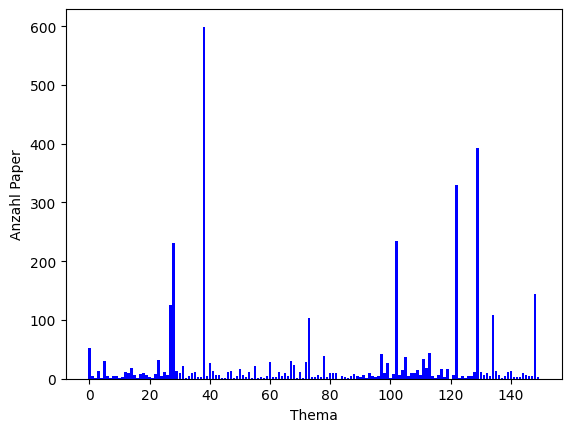

In [77]:
#plot number of papers per topic. topics are number-coded with codes created above in ldamodel
import matplotlib.pyplot as plt
tmp_barplot = stats_topic_to_paper.topic.value_counts(ascending=True).to_frame()
tmp_barplot.rename(columns={'topic': 'paper'}, inplace=True)
plt.bar(tmp_barplot.index, tmp_barplot.paper, color='b')
plt.ylabel("Anzahl Paper")
plt.xlabel("Thema")      